# Neural networks with Scikit-learn

In [1]:
import sklearn 
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Table of Contents

### Regression

#### Prepare data

In [2]:
diet_data = pd.read_csv('datasets/diet_data.csv')
diet_data = diet_data.sample(frac=1).reset_index(drop=True)
diet_data.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,9/13/2018,11.0,12.0,4.0,2660.0,6300.0,2.37,1.0,1.0,0.0,1.0,1.0,1.0,18.0
1,8/16/2018,11.0,11.0,8.0,2648.0,2450.0,0.93,1.0,1.0,0.0,0.0,0.0,0.0,10.0
2,9/4/2018,11.0,13.0,2.0,2674.0,2400.0,0.90,0.0,1.0,0.0,0.0,1.0,1.0,-2.0
3,10/18/2018,11.0,12.0,6.0,2662.0,3200.0,1.20,0.0,0.0,0.0,0.0,0.0,0.0,26.0
4,12/7/2018,11.0,11.0,0.0,2640.0,2800.0,1.06,0.0,1.0,1.0,1.0,0.0,1.0,16.0
5,8/10/2018,11.0,10.0,6.0,2630.0,3000.0,1.14,1.0,1.0,0.0,1.0,0.0,0.0,12.0
6,8/26/2018,11.0,12.0,4.0,2660.0,5400.0,2.03,0.0,1.0,0.0,1.0,0.0,0.0,46.0
7,12/26/2018,NaN,NaN,NaN,0.0,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,8/12/2018,11.0,13.0,4.0,2676.0,2800.0,1.05,0.0,1.0,0.0,1.0,0.0,0.0,-12.0
9,9/2/2018,12.0,1.0,6.0,2710.0,4600.0,1.70,0.0,0.0,0.0,1.0,0.0,0.0,14.0


In [3]:
diet_data= diet_data.dropna()

In [4]:
diet_data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


In [5]:
diet_data_corr = diet_data.corr()
diet_data_corr

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387
prot,-0.133707,0.135703,0.040839,-0.089135,0.073819,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,0.035156


<Axes: >

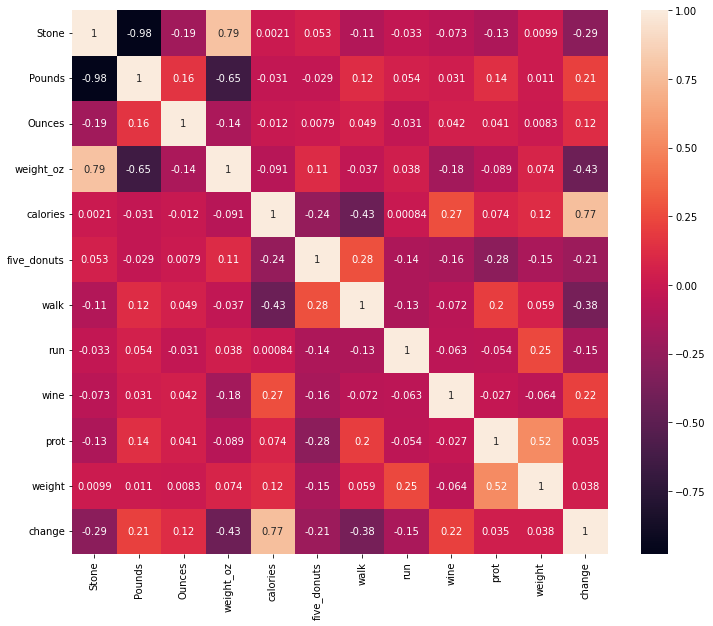

In [6]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(diet_data_corr,annot=True)

In [7]:
from sklearn.model_selection import train_test_split

X = diet_data.drop(['change','Stone','Date','Pounds','Ounces'],axis=1)
Y = diet_data['change']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
x_train.sample(5)

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight
99,2696.0,2200.0,0.82,1.0,1.0,0.0,0.0,0.0,0.0
95,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0
18,2674.0,2300.0,0.86,0.0,1.0,0.0,0.0,1.0,1.0
27,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0
65,2656.0,1950.0,0.73,1.0,1.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.preprocessing import StandardScaler # 0 mean and unit variance

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


#### Neural network regression

In [10]:
from sklearn.neural_network import MLPRegressor

In [11]:
#  hidden layer size = (nb neurone layer 1,nb neurone layer 2 , ...)
# lbfgs good for small dataset
# verbose = True -> display the hyperparameters
mlp_reg = MLPRegressor(activation = 'relu',
                       hidden_layer_sizes=(2,4 ),
                       solver = 'lbfgs',
                       verbose=True,
                       max_iter=1000)

In [12]:
mlp_reg.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(2, 4), max_iter=1000, solver='lbfgs',
             verbose=True)

In [13]:
y_pred = mlp_reg.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
mlp_reg.score(x_train,y_train)

0.7990343785160878

In [15]:
r2_score(y_test,y_pred)

0.7883703213438346

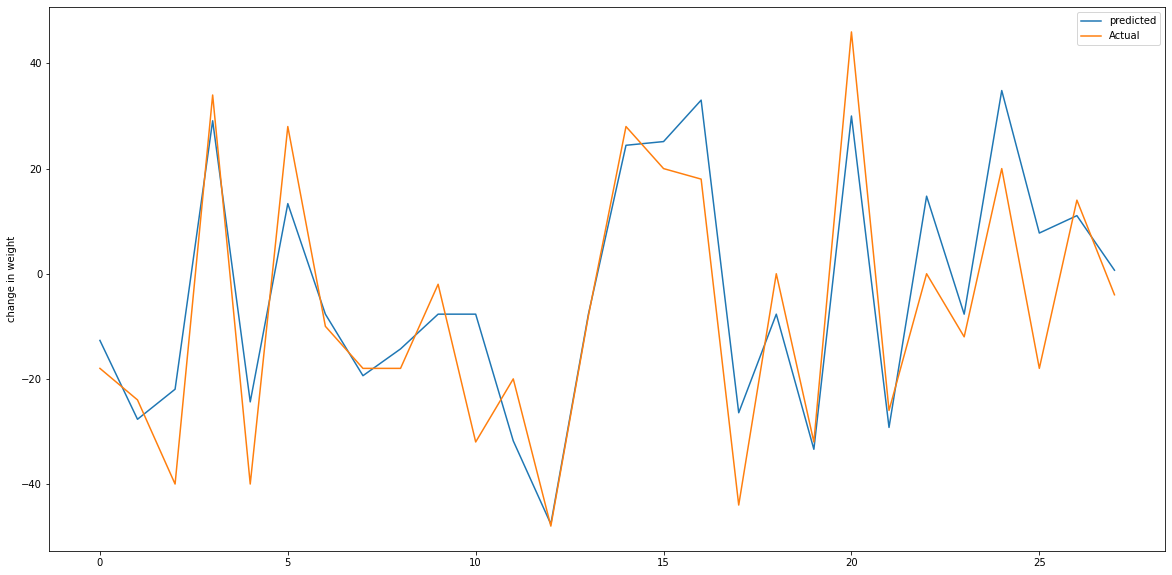

In [16]:
plt.figure(figsize=(20,10))
plt.plot(y_pred,label='predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('change in weight')
plt.legend()
plt.show()


### Classification

#### Prepare data

In [17]:
spine_data = pd.read_csv('datasets/spine_data.csv',
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic_tilt',
                                'lumbar_lordosis_angle'
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class'])

In [18]:
spine_data = spine_data.sample(frac=1).reset_index(drop=True)
spine_data.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_anglesacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,44.630914,34.695154,130.075660,37.364540,0.690088,18.0873,18.1846,15.62397,-22.670743,37.0558,Abnormal,NaN
1,58.001429,52.883139,123.632260,25.970206,0.330439,8.3510,9.9145,16.25839,-27.302888,25.0493,Normal,NaN
2,77.054565,53.130102,117.042244,62.765348,0.418464,29.7716,16.1890,8.58139,-31.511149,32.6221,Abnormal,NaN
3,46.902096,35.417055,129.220682,4.994195,0.537574,33.0601,7.8080,11.37660,-5.202362,33.2503,Normal,NaN
4,42.000000,53.130102,131.802491,-8.290203,0.308799,17.9008,16.4723,8.02315,-34.615429,9.9615,Normal,NaN
5,20.030886,23.868330,118.363389,2.062963,0.371351,21.1136,7.1646,9.82029,-6.841914,11.6156,Abnormal,NaN
6,40.796698,55.304846,98.622512,36.706395,0.672570,29.0324,14.5804,16.56784,-0.269590,31.7726,Abnormal,NaN
7,64.000000,42.137595,116.735387,30.341203,0.431125,22.2530,17.6755,12.20726,-21.986137,23.1484,Abnormal,NaN
8,36.031975,32.811367,116.555168,-6.054538,0.098119,10.0549,8.7771,8.64451,-5.079724,29.4263,Normal,NaN
9,36.674857,23.448063,131.922009,-4.968980,0.794717,31.3737,18.3533,13.16102,-6.652617,26.3297,Normal,NaN


In [19]:
spine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
pelvic_tilt,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
lumbar_lordosis_anglesacral_slope,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
pelvic_radius,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
degree_spondylolisthesis,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
pelvic_slope,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
direct_tilt,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
thoracic_slope,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080
cervical_tilt,310.0,-14.053139,12.225582,-35.287375,-24.289522,-14.622856,-3.497094,6.972071
sacrum_angle,310.0,25.645981,10.450558,7.007900,17.189075,24.931950,33.979600,44.341200


In [20]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
spine_data['class']=label_encoding.fit_transform(spine_data['class'].astype(str))
spine_data['scoliosis_slope']=label_encoding.fit_transform(spine_data['scoliosis_slope'].astype(str))

In [21]:
spine_data.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_anglesacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
25,44.991547,42.157862,101.723334,25.773174,0.052602,31.0079,14.4887,14.17105,-31.121553,32.2469,0,14
37,83.352194,55.388858,126.912990,71.321175,0.998827,7.0551,9.0119,9.85541,-19.314135,43.0086,0,14
292,60.859873,51.952957,125.659534,74.333409,0.600116,25.6364,17.7501,7.88600,4.442569,13.4605,0,14
250,31.334500,36.665635,108.648265,-7.825986,0.688010,31.3502,16.5097,15.17645,-0.502127,18.3437,0,12
161,58.038865,45.734521,105.131664,30.409133,0.414693,17.6829,16.5256,10.35218,1.270053,10.4207,0,14
103,52.766595,48.503532,116.803091,54.816867,0.286894,18.5916,15.4963,15.92252,1.320769,34.8665,0,14
225,47.000000,33.111342,116.806587,5.766947,0.416722,16.5158,18.6222,8.51898,-33.441303,13.2498,0,0
303,29.504381,32.124998,127.139849,-0.460894,0.281612,24.1257,11.2762,11.54866,-12.025220,44.3412,1,14
13,75.966361,50.500411,103.582540,-0.443661,0.647609,29.0187,13.1408,9.58711,-22.403652,12.5917,1,14
198,52.000000,55.175511,119.193724,32.108537,0.267292,26.9716,18.3111,13.67428,-19.605044,22.7590,0,14


In [22]:
spine_data_corr = spine_data.corr()
spine_data_corr

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_anglesacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
pelvic_incidence,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484,0.157280
pelvic_tilt,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602,0.165348
lumbar_lordosis_anglesacral_slope,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857,0.005716
pelvic_radius,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687,0.118288
degree_spondylolisthesis,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865,0.030511
pelvic_slope,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591,0.028541
direct_tilt,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354,-0.020555
thoracic_slope,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044,0.074754
cervical_tilt,0.057199,0.000207,0.029738,0.023021,0.060743,-0.037428,0.011354,0.057451,1.000000,0.015337,-0.026887,0.028608
sacrum_angle,-0.049054,0.032853,-0.030145,-0.041023,-0.073893,-0.024021,0.009541,0.021243,0.015337,1.000000,0.069315,0.057319


<Axes: >

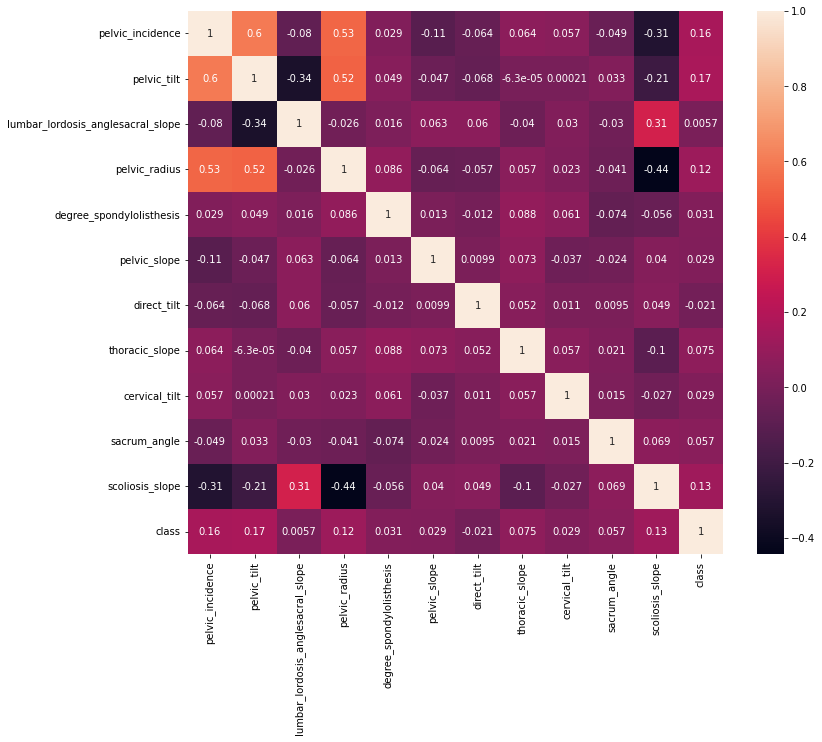

In [23]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(spine_data_corr,annot=True)

In [24]:
from sklearn.model_selection import train_test_split

X = spine_data.drop('class',axis=1)
Y = spine_data['class']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

#### Neural network classification

In [28]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(10, ),
                       max_iter=1000,
                       activation='relu',
                       alpha=0.0001,
                       solver='lbfgs',
                       verbose=True)

In [29]:
mlp_clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, solver='lbfgs',
              verbose=True)

In [30]:
y_pred = mlp_clf.predict(x_test)

In [31]:
pred_results = pd.DataFrame({'y_test' : y_test,
                            'y_pred' : y_pred})
pred_results.sample(10)

,y_test,y_pred
126,14,14
226,14,14
130,14,14
158,14,14
297,14,14
248,14,14
293,14,14
199,14,14
75,14,14
180,14,14


In [34]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print("accuracy : ", acc) # how many value is right


accuracy :  0.9354838709677419


In [35]:
spine_data_crosstab = pd.crosstab(pred_results.y_test,pred_results.y_pred)
spine_data_crosstab

y_pred,2,3,14
y_test,,,
1,0,0,1
9,0,0,1
14,1,1,58


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0  0  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  1]
 [ 0  1  1  0 58]]


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          14       0.97      0.97      0.97        60

    accuracy                           0.94        62
   macro avg       0.19      0.19      0.19        62
weighted avg       0.94      0.94      0.94        62



/home/tafonso/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tafonso/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tafonso/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tafonso/.local/lib/python3.8/site-packa

### Text classification

#### Prepare data

In [39]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups()

In [40]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [41]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [42]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [43]:
print(newsgroups.data[4])

From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA
Distribution: sci
Lines: 23

From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):
>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...
>>>"Clear caution & warning memory.  Verify no unexpected
>>>errors. ...".  I am wondering what an "expected error" might
>>>be.  Sorry if this is a really dumb question, but
> 
> Parity errors in memory or previously known conditions that were waivered.
>    "Yes that is an error, but we already knew about it"
> I'd be curious as to what the real meaning of the quote is.
> 
> tom


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after launch, and suchlike. Rather than fix the code
and possibly i

In [45]:
print(newsgroups.target_names[newsgroups.target[4]])

sci.space


#### TF-IDF

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf_vect = TfidfVectorizer(stop_words='english')
newsgroups_transformed = tfidf_vect.fit_transform(newsgroups.data)

In [49]:
import random

random.sample(tfidf_vect.vocabulary_.items(),10)

[('lqfco6kv', 76849),
 ('u8nj', 117352),
 ('71611', 18363),
 ('f79zx', 53872),
 ('24559', 9541),
 ('barre', 31860),
 ('qiclab', 97612),
 ('k24kc_f', 71234),
 ('900gts', 21480),
 ('mismanaged', 82293)]

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(newsgroups_transformed,newsgroups.target,shuffle=True,test_size=0.2)

#### MLP

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(32, ),
                       max_iter=50,
                       activation='relu',
                       solver='adam',
                       verbose=True)

In [53]:
mlp_clf.fit(x_train,y_train)

Iteration 1, loss = 2.93189692
Iteration 2, loss = 2.55194396
Iteration 3, loss = 2.02959196
Iteration 4, loss = 1.48691714
Iteration 5, loss = 1.03595332
Iteration 6, loss = 0.71064554
Iteration 7, loss = 0.49235170
Iteration 8, loss = 0.35059387
Iteration 9, loss = 0.25767253


/home/tafonso/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(32,), max_iter=50, verbose=True)

In [54]:
y_pred = mlp_clf.predict(x_test)

In [55]:
pred_results = pd.DataFrame({'y_test' : y_test,
                            'y_pred' : y_pred})
pred_results.sample(10)

,y_test,y_pred
362,18,18
1814,10,10
242,17,17
1813,2,2
1791,12,12
2155,8,6
1478,12,12
1574,2,2
719,3,3
933,14,14


In [56]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print("accuracy : ", acc) # how many value is right


accuracy :  0.9204595669465312


### Image classification

#### Prepare data

In [1]:
import cv2
import os

In [ ]:
dataset_path = 'datasets/Lego/train/'

In [ ]:
def load_images(path):
    images_train = []
    labels_train = []
    for sub_folder in os.listdir(path):
        fullpath = os.path.join(path,sub_folder)
        print(fullpath)
        if not os.path.isdir(fullpath):
            continue
        images = os.listdir(fullpath)
        for image_filename in images:
            images_fullpath = os.path.join(fullpath,image_filename)
            if os.path.isdir(image_fullpath):
                continue
            img = cv2.imread(image_fullpath)
            images_train.append(img)
            labels_train.append(sub_folder)
    return np.array(images_train), np.array(labels_train)

In [ ]:
images_train,labels_train = load_images(dataset_path)

In [ ]:
images_train.shape

In [ ]:
plt.imshow(images_train[10])
print('Label: ',labels_train[10])

#### Classification model

In [ ]:
X = images_train.reshape(images_train.shape[0],images_train.shape[1]*images_train.shape[2]*images_train.shape[3])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(labels_train)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,test_size=0.2)

In [ ]:
from sklearn.neural_network import MLPCLlassifier

clf_image =MLPClassifier(hidden_layer_sizes=(100,100,100),
                       max_iter=100,
                       activation='relu',
                       solver='adam',
                       verbose=True)

In [ ]:
clf_image.fit(x_train,y_train)

In [ ]:
y_pred = clf_image.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

### Dimensionality reduction using Boltzmann Machines